In [129]:
import pickle
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

In [130]:
import sys
import os
address = (os.sep).join(os.getcwd().split(os.sep)[:-3])
print(address)
sys.path.append(address)
print(sys.path)
import util.items as items
import util.scraper as scraper

/home/makoa/School/osrs_research
['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/makoa/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/home/makoa/.local/lib/python3.6/site-packages/IPython/extensions', '/home/makoa/.ipython', '/home/makoa/School/osrs_research/ML', '/home/makoa/School/osrs_research/ML/OSRS/Results', '/home/makoa/School/osrs_research', '/home/makoa/School/osrs_research', '/home/makoa/School/osrs_research', '/home/makoa/School/osrs_research']


In [131]:
with open('all.pickle','rb') as f:
    results = pickle.load(f)

In [132]:
len(results)

2991

In [133]:
results['Abyssal_whip'].keys()

dict_keys(['buyAndHold', 'numPrices', 'numEpochs', 'sellSignal', 'startLoss', 'buyLimit', 'item', 'numBuys', 'model', 'budget', 'startMAE', 'endMAE', 'numSells', 'persist', 'perfect', 'testPrices', 'endLoss', 'predictions', 'buySignal'])

In [134]:
modelProfs = [(item,results[item]['model']) for item in results ]

In [135]:
modelProfs = sorted(modelProfs, key=lambda x: x[1], reverse=True)

In [136]:
pprint(modelProfs[0:10])

[('Unlit_torch', 6.829268292682927),
 ('Royal_crown', 6.713306185607469),
 ('Leather_vambraces', 4.9603174603174605),
 ('Sardine', 4.499812507812175),
 ('Coconut', 4.275536841688379),
 ('Bronze_kiteshield', 3.9946737683089215),
 ('Leather_cowl', 3.9682539682539684),
 ('Spice', 3.7166415564945816),
 ('Bronze_longsword', 3.594249201277955),
 ('Bronze_full_helm', 3.315579227696405)]


In [ ]:
modVSpers = [(item,results[item]['model']-results[item]['persist']) for item in results ]
modVSbah = [(item,results[item]['model']-results[item]['buyAndHold']) for item in results ]

In [ ]:
modVSpers = sorted(modVSpers, key=lambda x: x[1], reverse=True)
modVSbah = sorted(modVSbah, key=lambda x: x[1], reverse=True)

In [ ]:
pprint(modVSpers[0:10])

[('Unlit_torch', 6.7073170731707314),
 ('Leather_cowl', 4.690476190476191),
 ('Leather_vambraces', 4.523809523809524),
 ('Bronze_kiteshield', 2.5013315579227697),
 ('Sardine', 2.375588517145119),
 ('Empty_fishbowl', 2.3168316831683167),
 ('Redberry_seed', 2.1214642262895174),
 ('Leather_body', 1.8602794411177643),
 ('Empty_sack', 1.7499125043747814),
 ('Dwellberry_seed', 1.7206494587843464)]


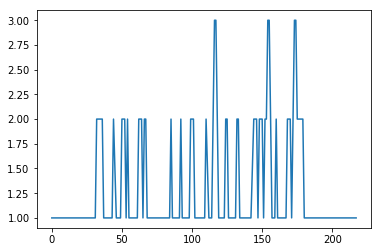

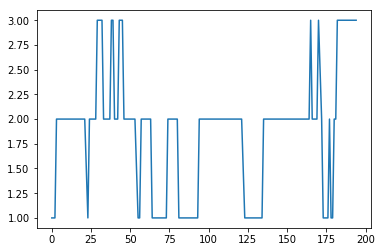

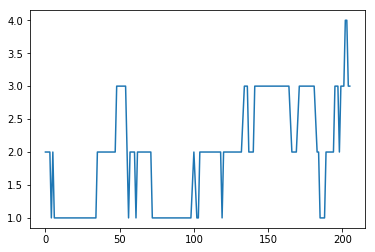

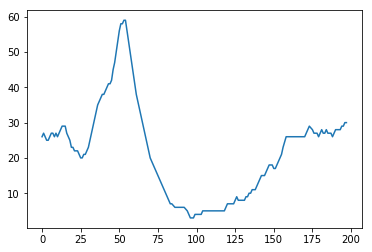

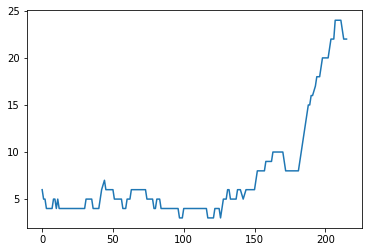

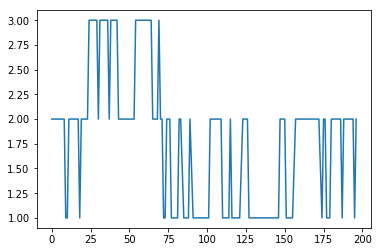

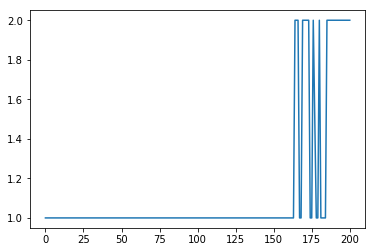

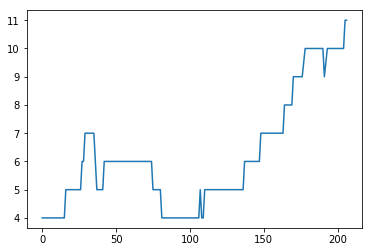

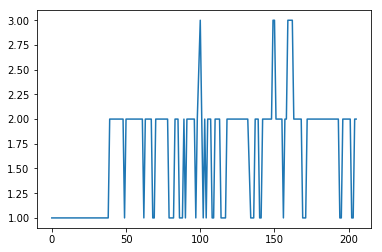

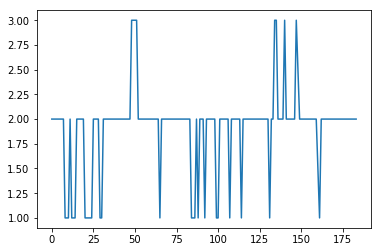

In [ ]:
for a in modVSpers[0:10]:
    prices = items.getPrices(a[0])
    prices = prices[int(.85*len(prices)):]
    plt.plot(prices)
    plt.show()

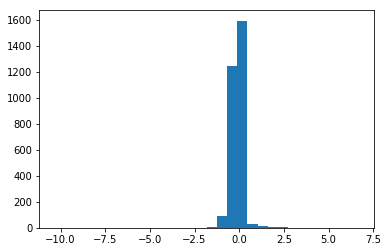

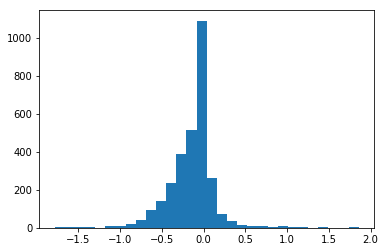

In [ ]:
plt.hist([a[1] for a in modVSpers],30)
plt.show()
plt.hist([a[1] for a in modVSpers if a[1]>-2 and a[1]<2],30)
plt.show()

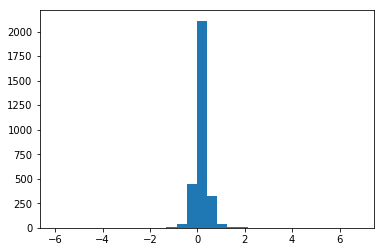

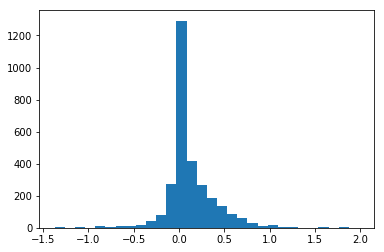

In [ ]:
plt.hist([a[1] for a in modVSbah],30)
plt.show()
plt.hist([a[1] for a in modVSbah if a[1]>-2 and a[1]<2],30)
plt.show()

In [ ]:
numProfModels = len([a for a in modelProfs if a[1]>0])
numProfmodVSpers = len([a for a in modVSpers if a[1]>0])
numProfmodVSbah = len([a for a in modVSbah if a[1]>0])

In [ ]:
print(len(results))
print(numProfModels/len(results))
print(numProfmodVSpers/len(results))
print(numProfmodVSbah/len(results))

In [ ]:
prices = [items.getPrices(item)[-1] for item in results]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results]
profs = [results[item]['model'] for item in results]
pers = [results[item]['persist'] for item in results]
perf = [results[item]['perfect'] for item in results]
bah = [results[item]['buyAndHold'] for item in results]

In [ ]:
print(np.corrcoef(prices,profs)[0][1])
print(np.corrcoef(buylimits,profs)[0][1])
print(np.corrcoef(buylimits,prices)[0][1])
print(np.corrcoef(profs,pers)[0][1])
print(np.corrcoef(profs,perf)[0][1])
print(np.corrcoef(profs,bah)[0][1])

In [ ]:
plt.scatter(prices,profs)
plt.xlim(0,10000)
plt.show()
plt.scatter(prices,profs)
plt.xlim(10000,1000000)
plt.show()

In [ ]:
plt.scatter(buylimits,profs)
plt.show()
plt.scatter(buylimits,profs)
plt.xlim(0,1000)
plt.show()

In [ ]:
actualModProfs = [(item,items.getPrices(item)[-1]*results[item]['model']) for item in results if items.getPrices(item)[-1]<10000000]
actualModProfs = sorted(actualModProfs, key=lambda x: x[1], reverse=True)

In [ ]:
actualModProfsPerDay = [(item,(items.getPrices(item)[-1]*results[item]['model'])/(results[item]['numPrices']*.15)) for item in results if items.getPrices(item)[-1]<10000000]
actualModProfsPerDay = sorted(actualModProfsPerDay, key=lambda x: x[1], reverse=True)

In [ ]:
actualModProfs[0:10]

In [ ]:
print(actualModProfsPerDay[0:10])

In [ ]:
plt.hist([a[1] for a in actualModProfs])
plt.show()